# `01` Import Necessary Libraries

## `i` Default Libraries

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## `ii` Additional Libraries
Add imports for additional libraries you used throughout the notebook

In [43]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report

----------------------------

# `02` Load & Split Data

Note: Make sure the `Data` folder attached with the notebook is in the same path for this cell to work properly.

[Dataset Link](https://www.kaggle.com/datasets/parisrohan/credit-score-classification)

In [3]:
train = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test.csv')

C:\Users\abdal\AppData\Local\Temp\ipykernel_23508\4177423669.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('Data/train.csv')


Split data via the method you see fit to ensure that you can estimate the generalization error.

----------------

# `03` Exploratory Data Analysis (EDA)

## `i` Simple Analysis

Preview data, perform statistical data analysis and explore as much as needed to better understand the data set we're dealing with.

`Notes:`
- Feel free to look up EDA approaches online for inspiration (however you **must understand** everything and not copy paste).
- Make sure to add notes and insights extracted from your analysis.


In [4]:
train.head()

ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   
3      19114.12                    NaN                  3  ...        Good   
4      19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt Credit_Utilization_Ratio     Credit_History_Age  \
0            809.98                26.822620  22 Years and 1 Months   
1            809.98                31.944960                    NaN   
2            809.98                28.609352  22 Years and 3 Months   
3            809.98                31.377862  22 Years and 4 Months   
4            809.98                24.797347  22 Years and 5 Months   

   Payment_of_Min_Amount Total_EMI_per_month Amount_invested_monthly  \
0                     No           49.574949       80.41529543900253   
1                     No           49.574949      118.28022162236736   
2                     No           49.574949         81.699521264648   
3                     No           49.574949       199.4580743910713   
4                     No           49.574949      41.420153086217326   

                  Payment_Behaviour     Monthly_Balance Credit_Score  
0   High_spent_Small_value_payments  312.49408867943663         Good  
1    Low_spent_Large_value_payments  284.62916249607184         Good  
2   Low_spent_Medium_value_payments   331.2098628537912         Good  
3    Low_spent_Small_value_payments  223.45130972736786         Good  
4  High_spent_Medium_value_payments  341.48923103222177         Good  

[5 rows x 28 columns]

In [5]:
train.shape

(100000, 28)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [7]:
train.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [8]:
train.duplicated().sum()

0

## `ii` Visual Analysis

Plot graphs and relations in order to gain more insights about the data set, identify patterns, and make assumptions.

`Notes:`
- Feel free to look up visual EDA approaches online for inspiration (however you **must understand** everything and not copy paste).
- Make sure to add notes and insights extracted from your analysis.

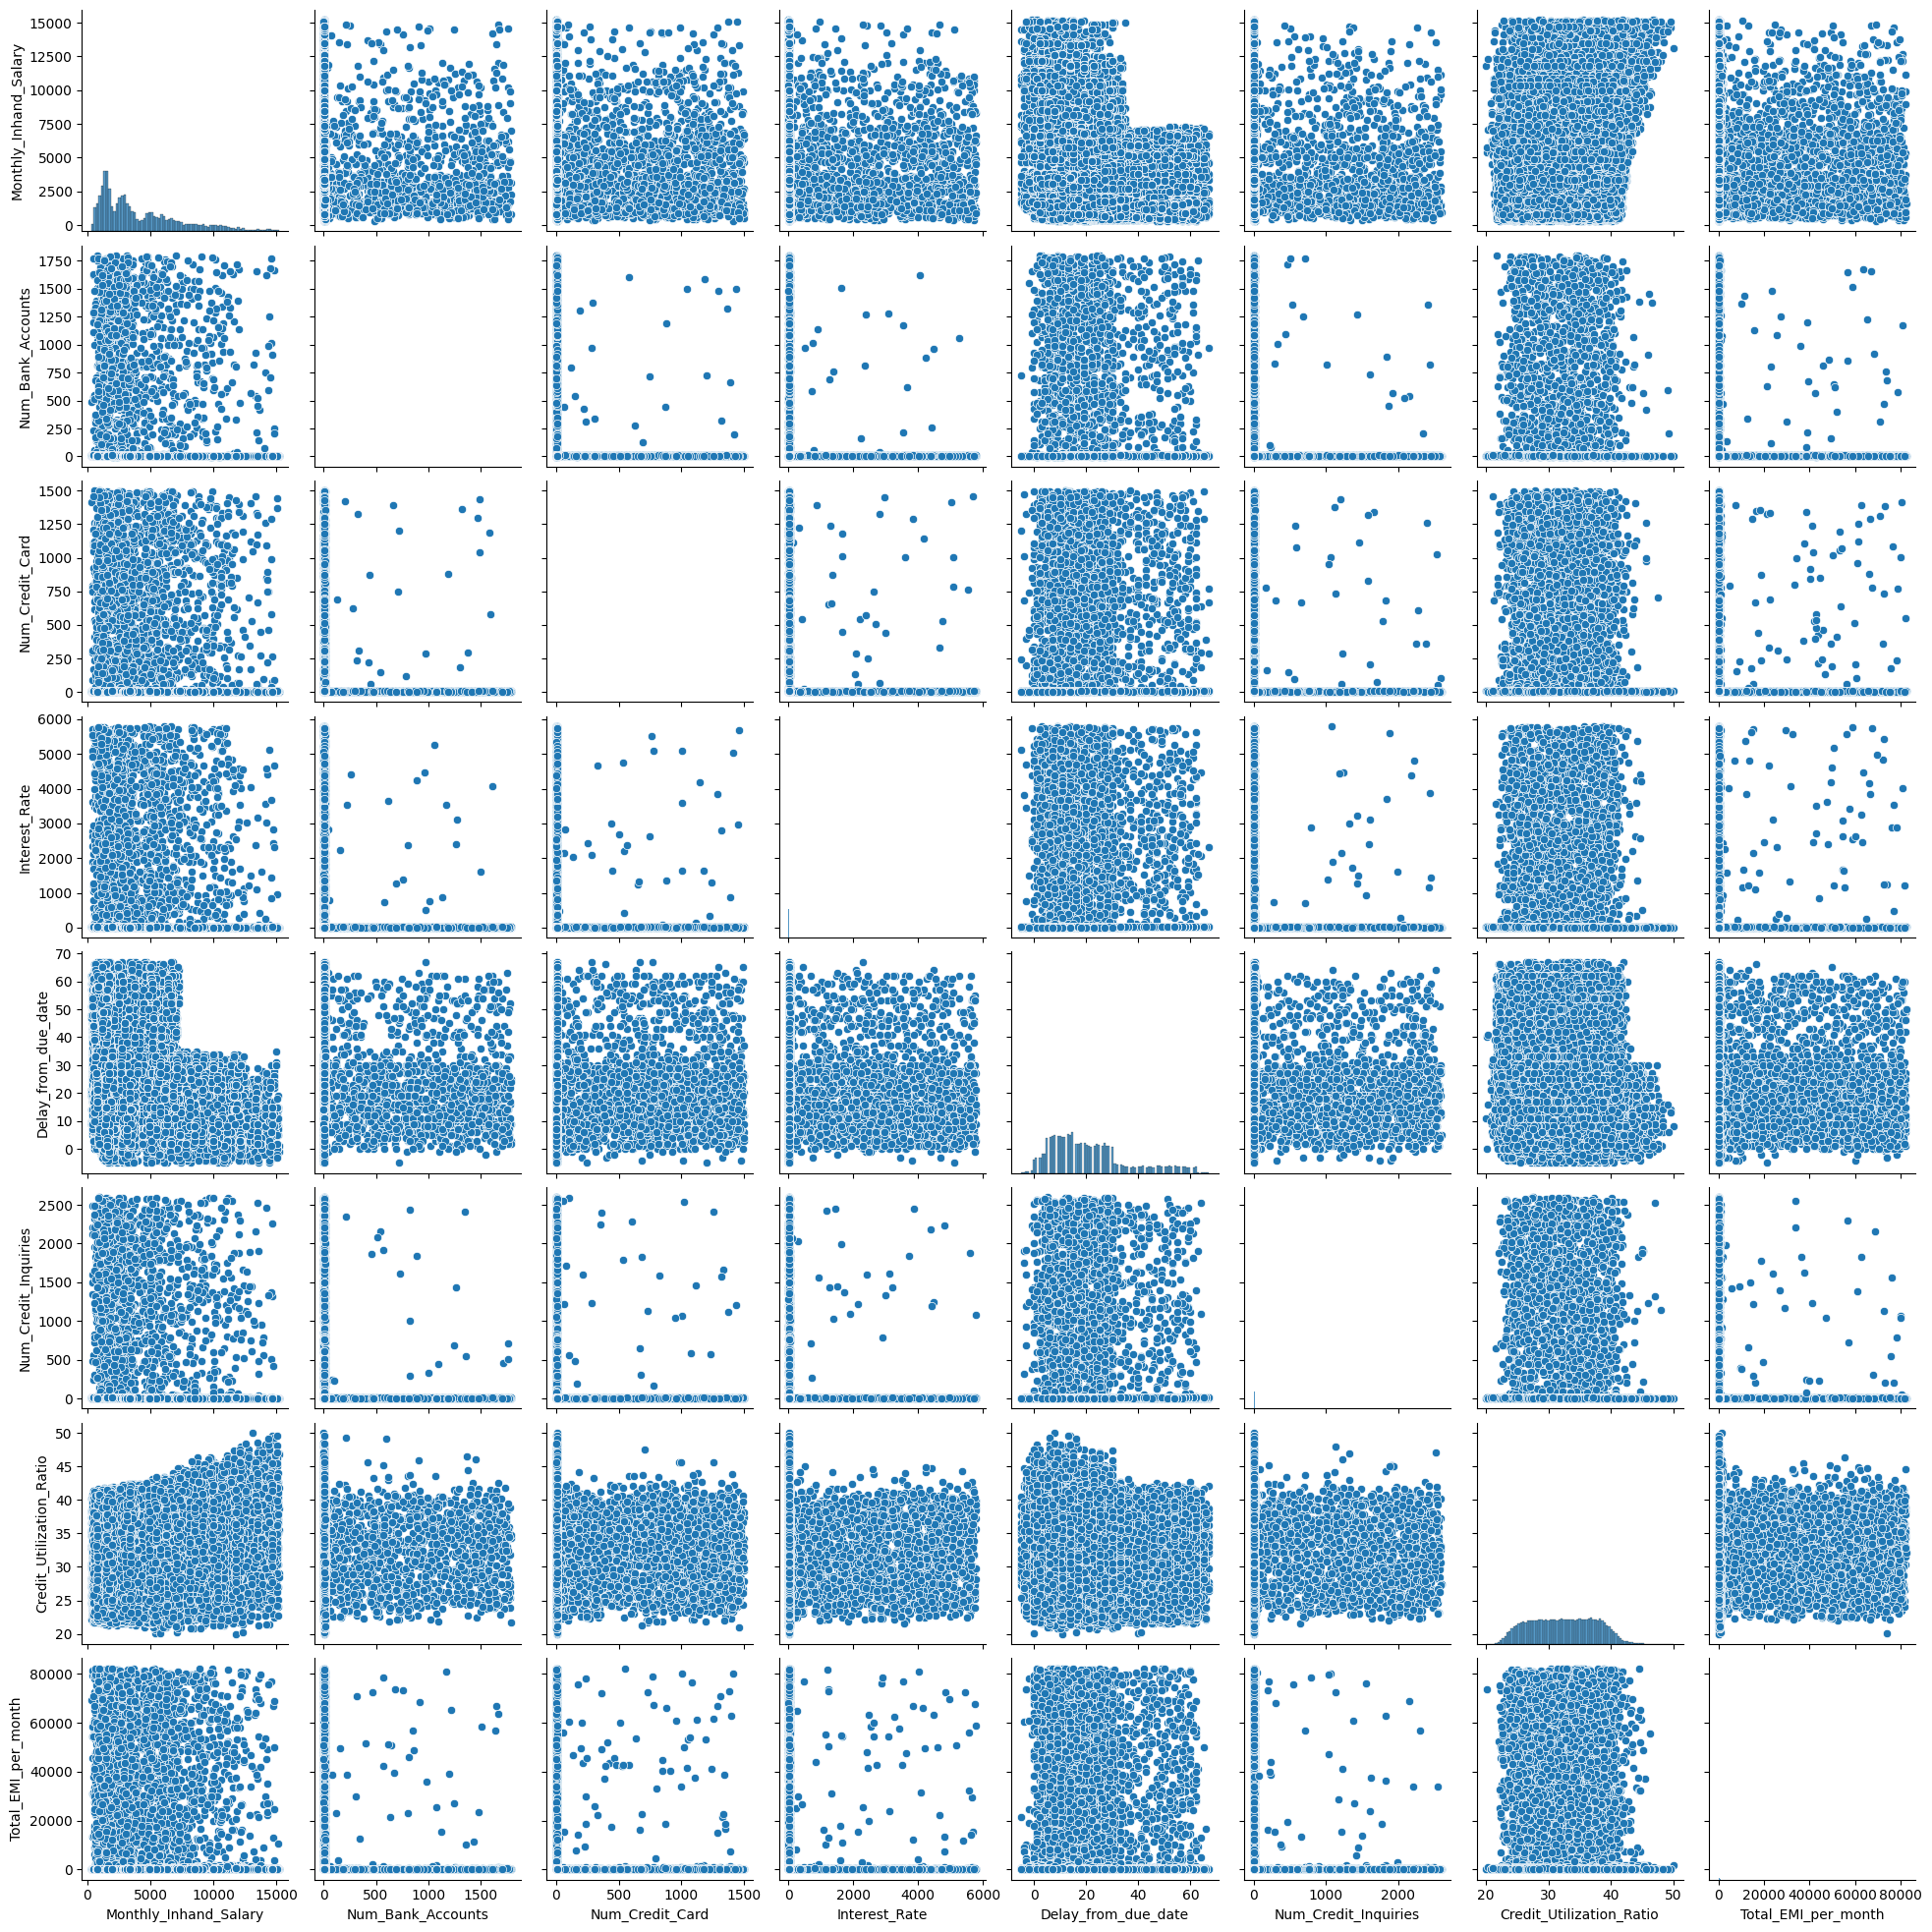

In [9]:
sns.pairplot(train)
plt.show()

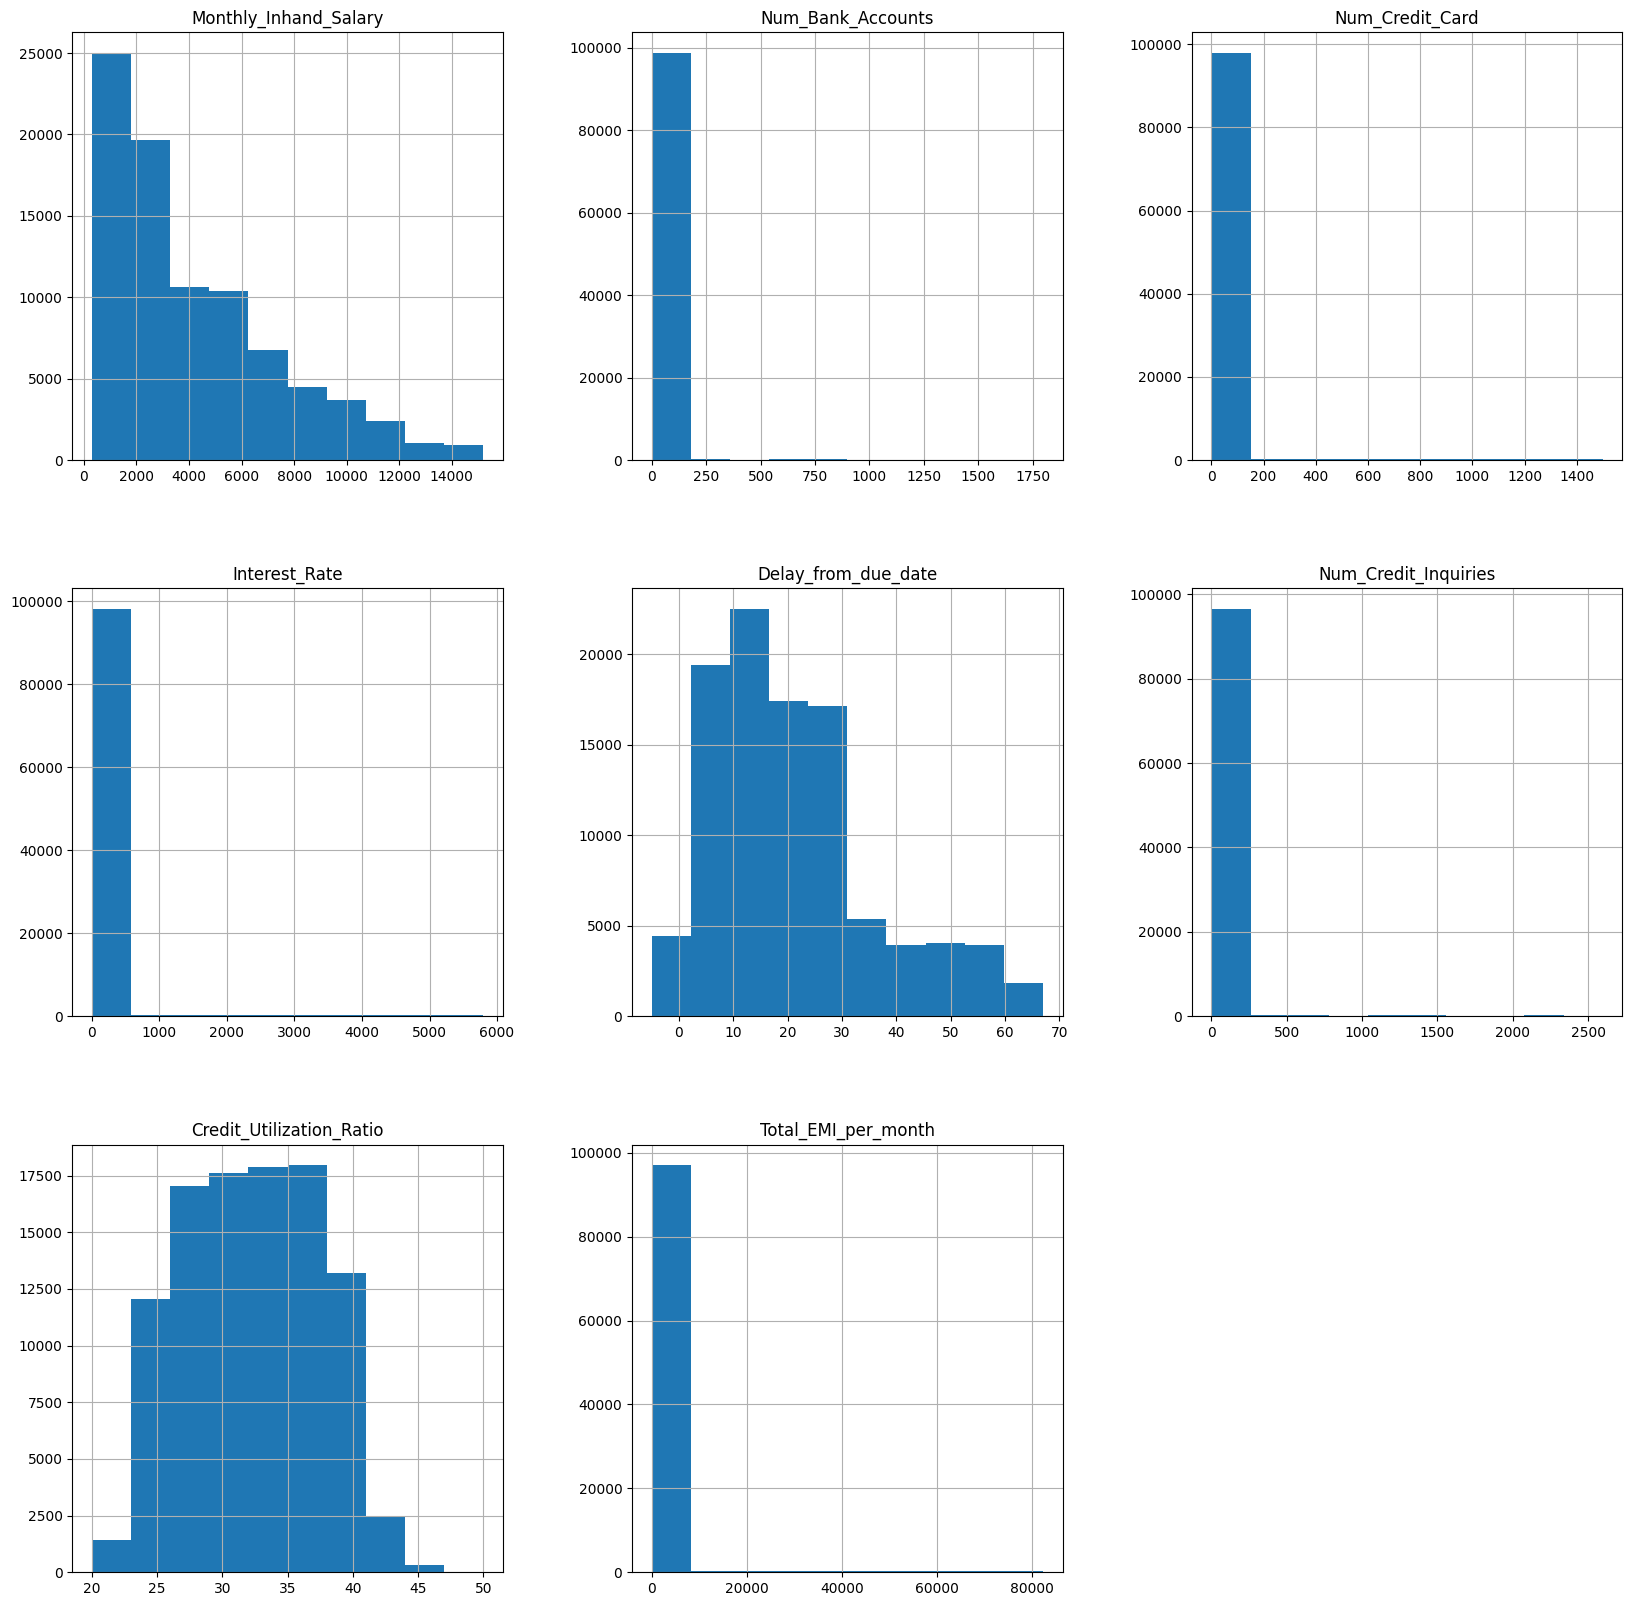

In [10]:
train.hist(figsize=(20, 20))
plt.show()

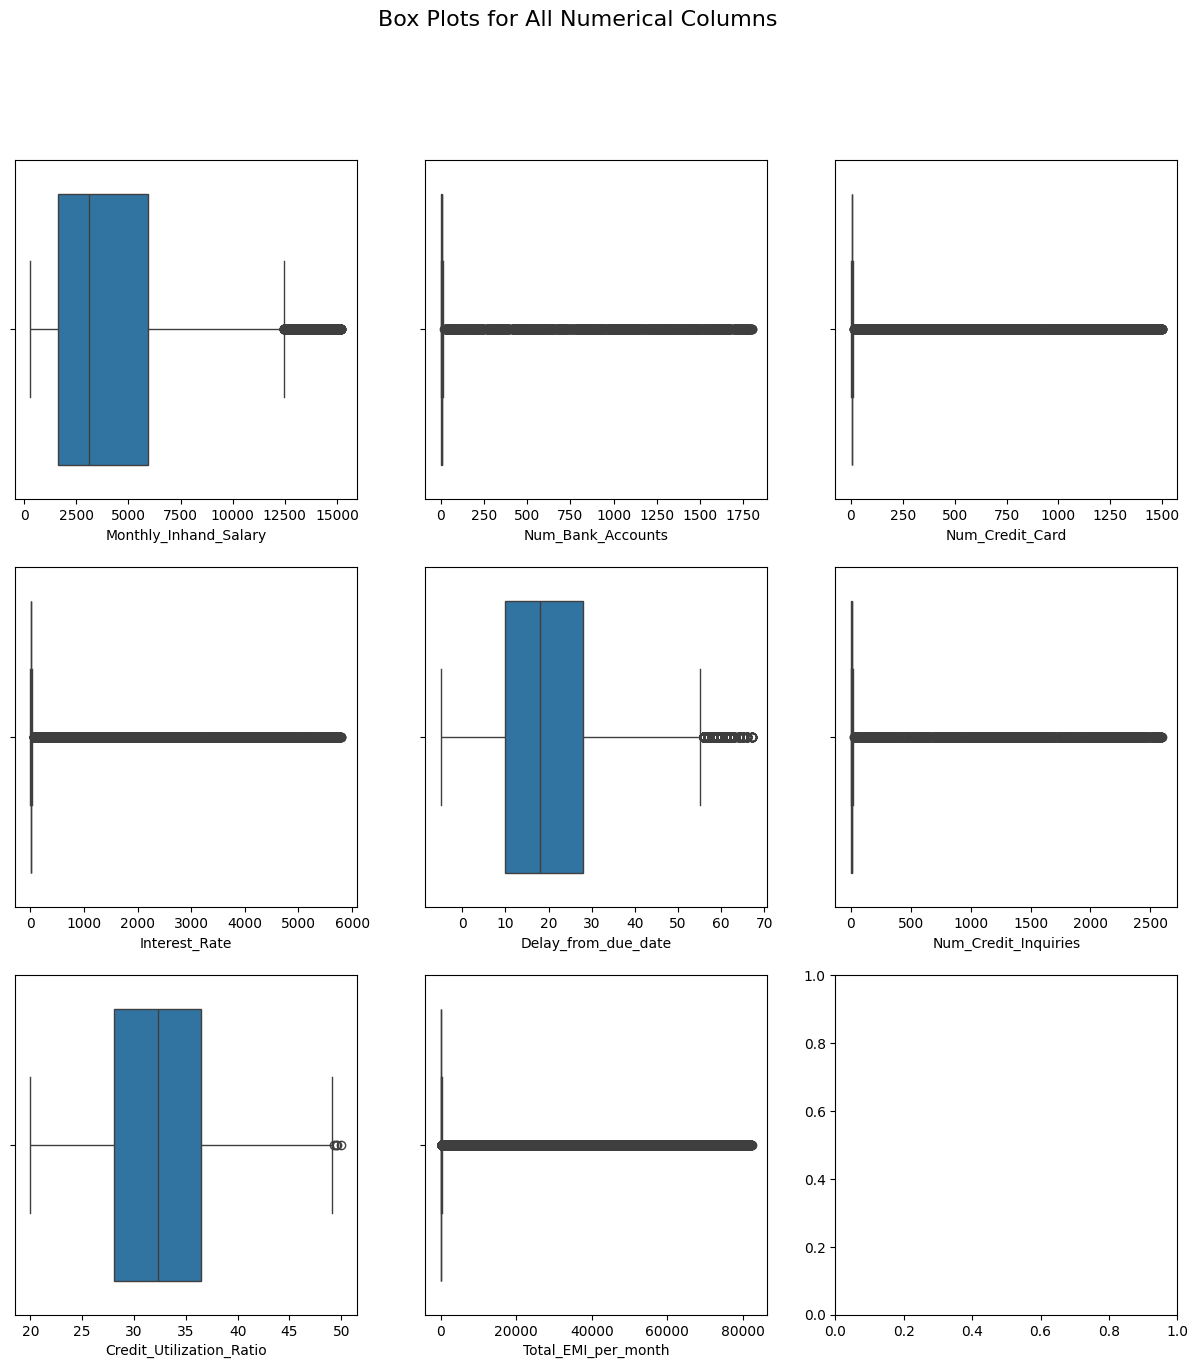

In [11]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
fig.suptitle('Box Plots for All Numerical Columns', fontsize=16)

numerical_columns = train.select_dtypes(include=[np.number]).columns

for ax, column in zip(axes.flatten(), numerical_columns):
    sns.boxplot(x=train[column], ax=ax)

plt.show()

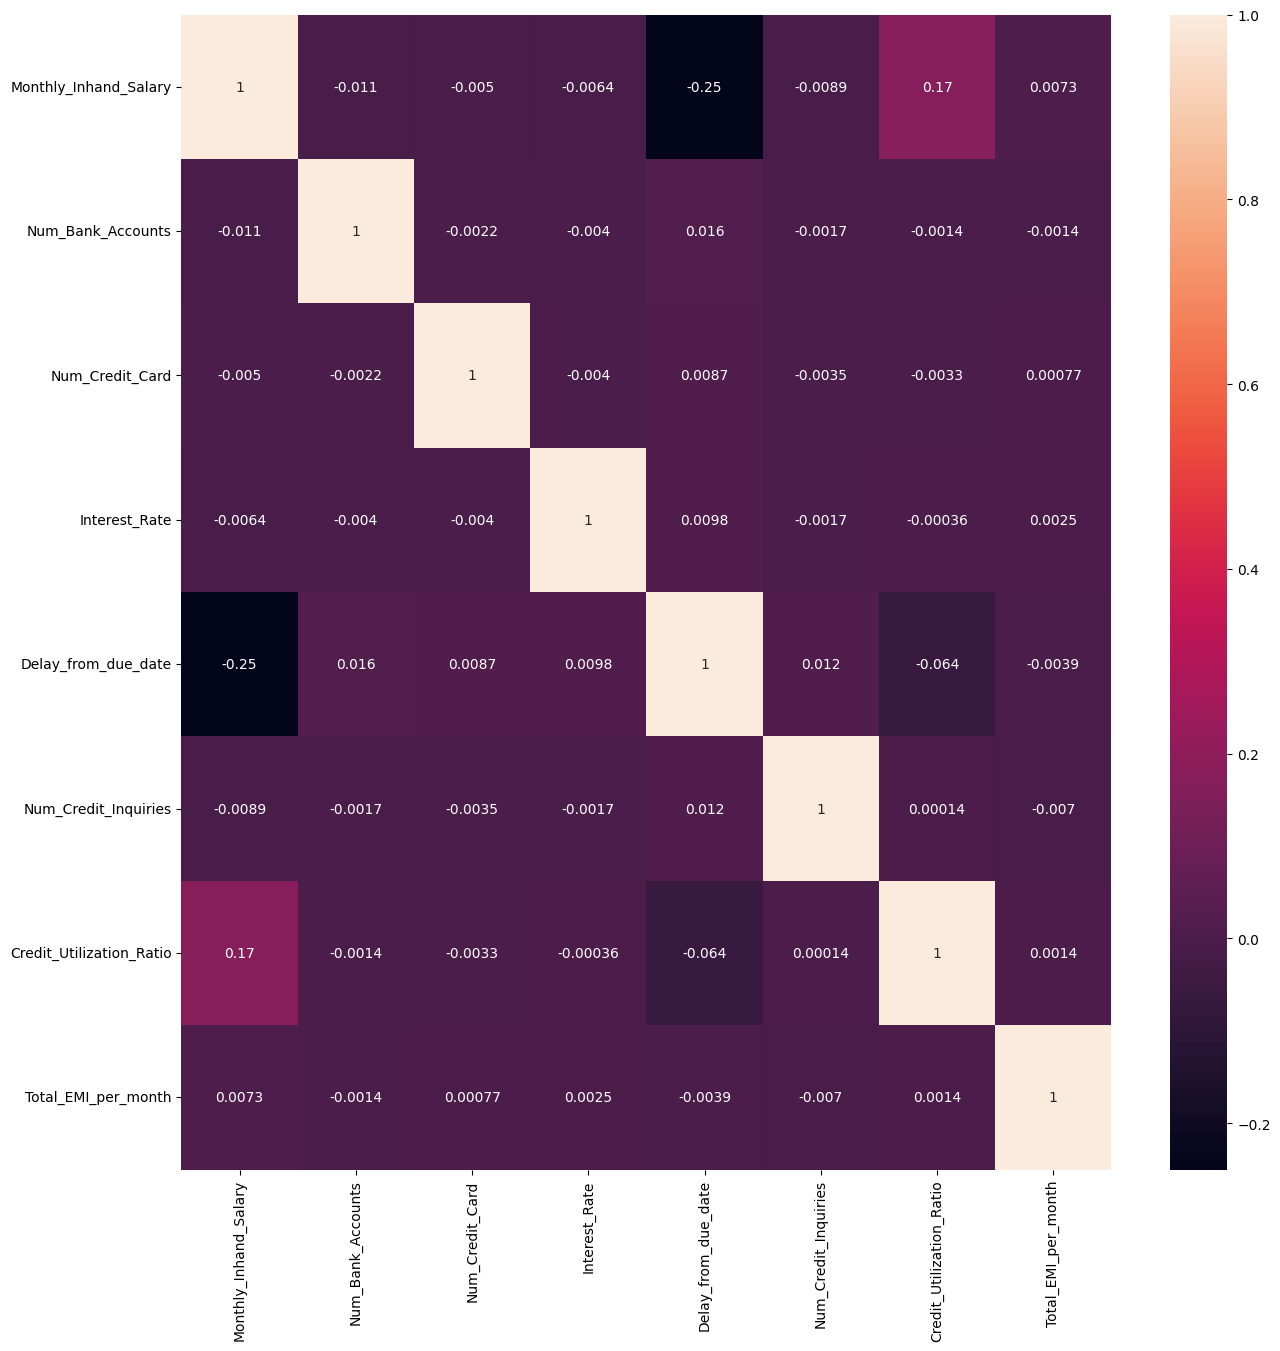

In [12]:
plt.figure(figsize=(15, 15))
sns.heatmap(train.select_dtypes(include=[np.number]).corr(),annot=True)
plt.show()

### This graphs before data cleaning and have a lot of outliers and corrupted data

----------------

# `04` Data Preparation

Perform data cleaning, feature engineering, scaling, dropping unwanted columns (such as IDs), etc. as needed to make sure it's ready for the model.

`Q` Is this dataset *skewed*?

`Note:` You can take a sample from the training data to make the model training and fine-tuning faster.

Hints:
- It could be helpful to check `sklearn.preprocessing` module.

In [13]:
train = train.map(lambda x: x.replace('_', '') if isinstance(x, str) else x)

In [14]:
train['Occupation'] = train['Occupation'].replace('_______', np.nan)
train['Payment_Behaviour'] = train['Payment_Behaviour'].replace('!@9#%8', np.nan)

In [15]:
columns_to_convert = [
    'Monthly_Balance', 'Amount_invested_monthly', 'Age',
    'Outstanding_Debt', 'Changed_Credit_Limit', 'Num_of_Loan',
    'Annual_Income','Num_of_Delayed_Payment'
]

for column in columns_to_convert:
    train[column] = pd.to_numeric(train[column], errors='coerce')

In [16]:
columns_to_remove_outliers = [
    'Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
  'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
   'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month',
   'Amount_invested_monthly','Monthly_Balance'
]

for column in columns_to_remove_outliers:
    Q1 = train[column].quantile(0.15)
    Q3 = train[column].quantile(0.85)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    train[column] = np.where((train[column] < lower_bound) | (train[column] > upper_bound), np.nan, train[column])


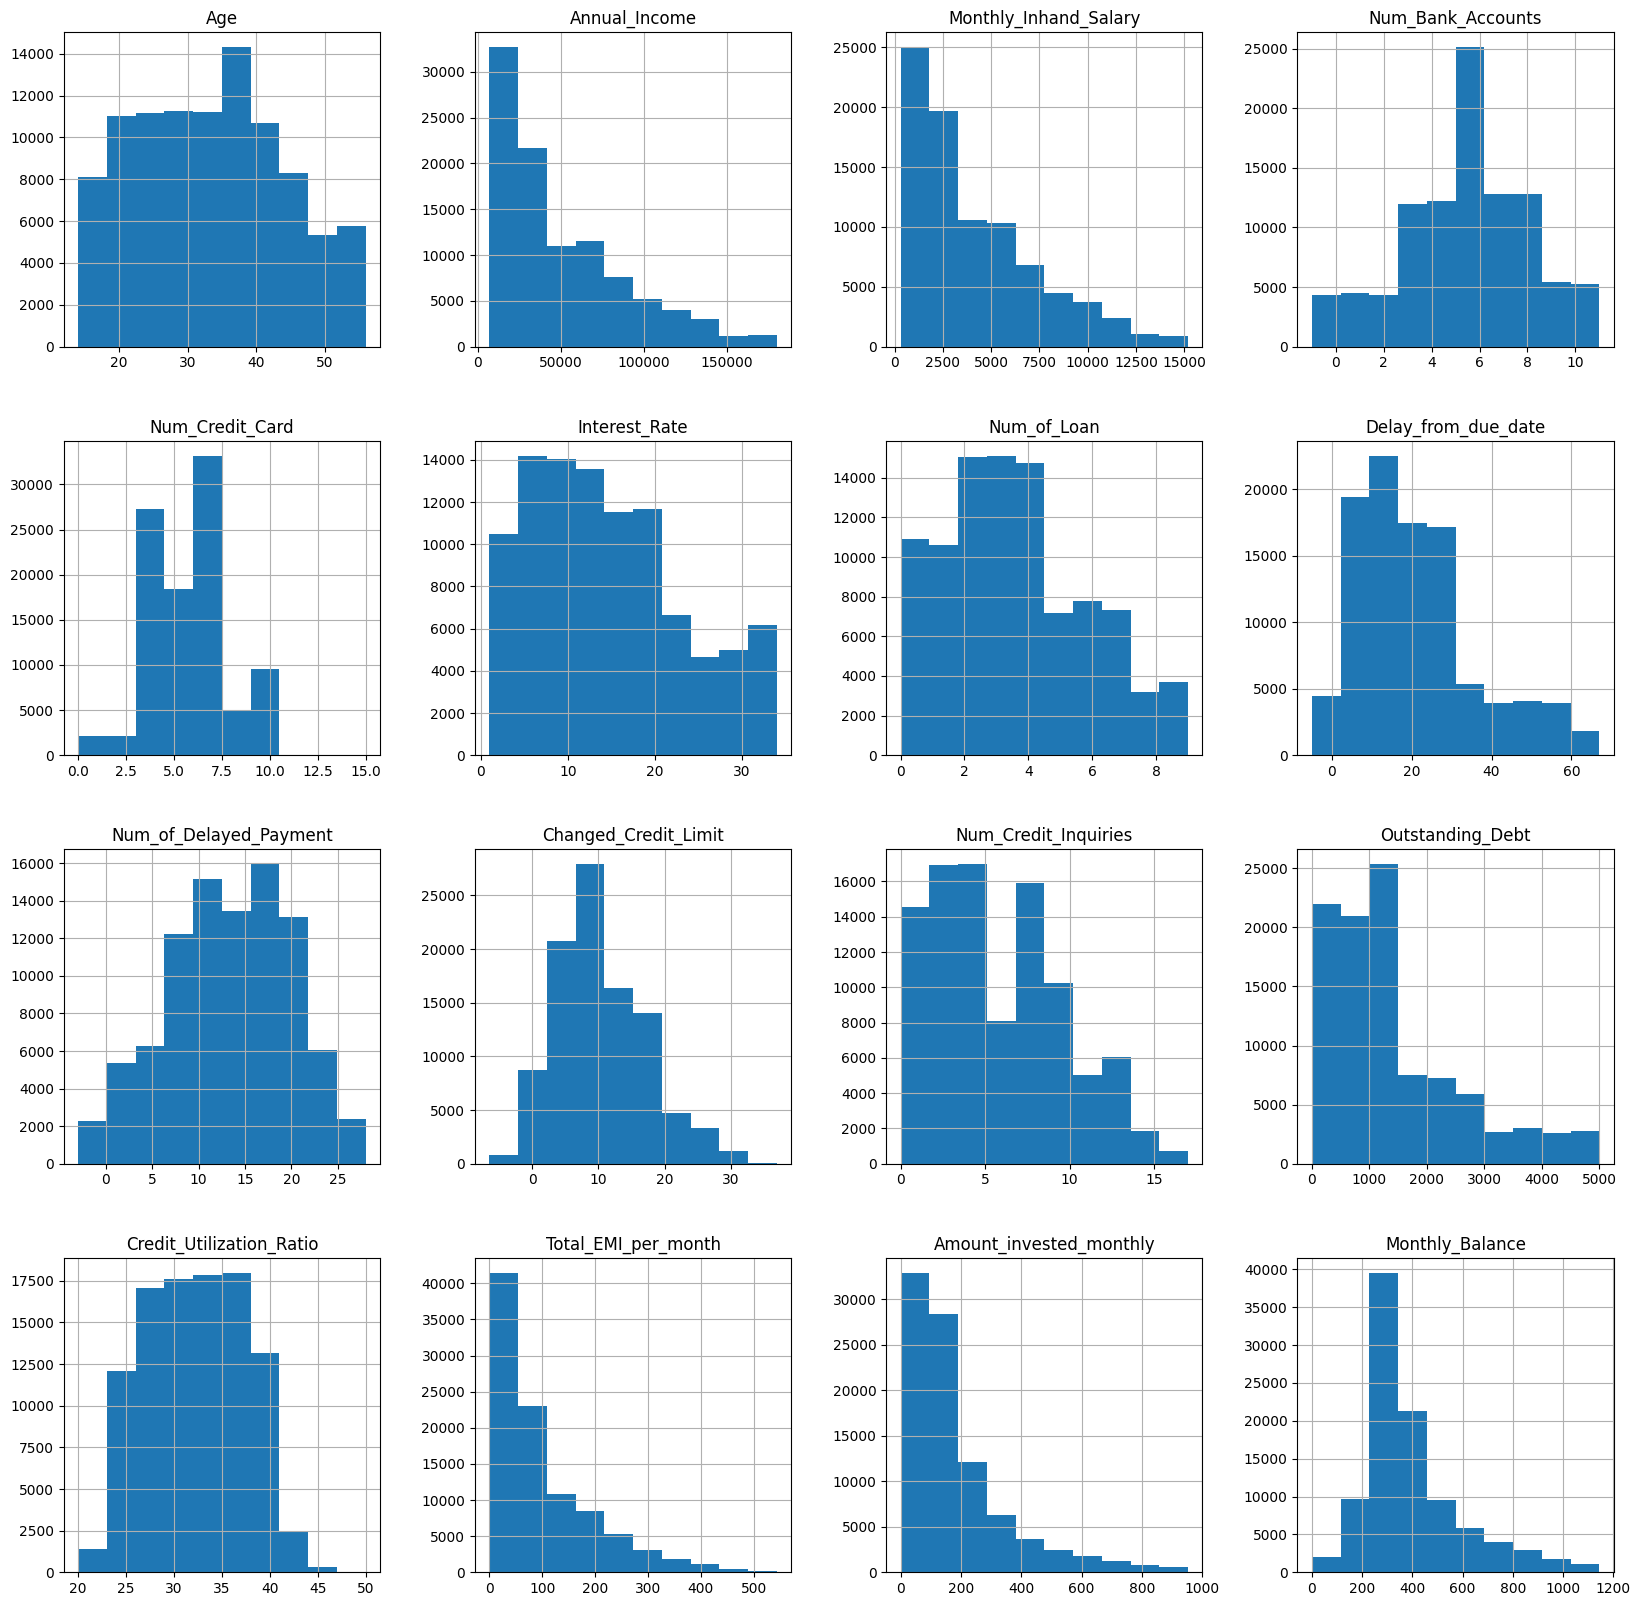

In [17]:
train.hist(figsize=(20, 20))
plt.show()

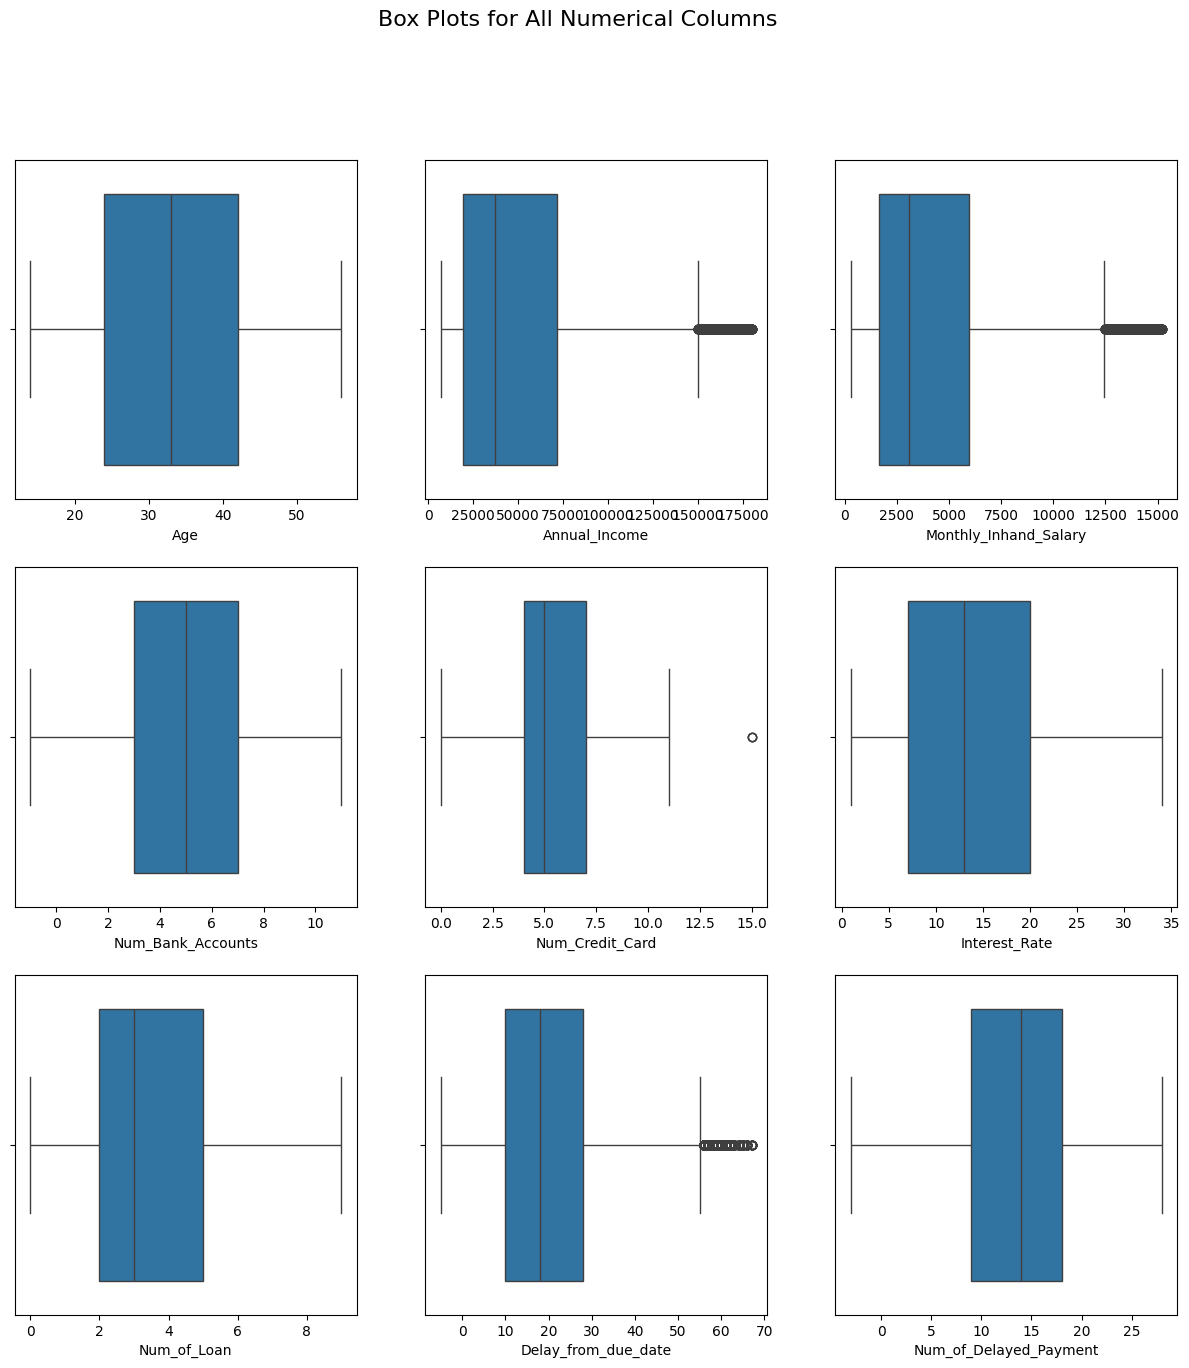

In [18]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
fig.suptitle('Box Plots for All Numerical Columns', fontsize=16)

numerical_columns = train.select_dtypes(include=[np.number]).columns

for ax, column in zip(axes.flatten(), numerical_columns):
    sns.boxplot(x=train[column], ax=ax)

plt.show()

### This graphs after data cleaning and handling outliers and corrupted data

In [19]:
train.drop(['ID', 'Customer_ID', 'Month', 'Name', 'SSN'], axis=1, inplace=True)

In [20]:
x = train.drop('Credit_Score', axis=1)
y = train['Credit_Score']

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
encoder = OrdinalEncoder()
categorical_columns = ['Type_of_Loan', 'Credit_History_Age', 'Occupation', 'Credit_Mix', 'Payment_Behaviour','Payment_of_Min_Amount']

x_train[categorical_columns] = encoder.fit_transform(x_train[categorical_columns])

In [24]:
target_encoder = LabelEncoder()
y_train = target_encoder.fit_transform(y_train)

In [25]:
imputer = KNNImputer()
x_train = imputer.fit_transform(x_train)
x_train = pd.DataFrame(x_train, columns=x.columns)

In [26]:
x_train.isnull().sum()

Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
dtype: int64

In [27]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled, columns=x.columns)

In [28]:
x_train

Age  Occupation  Annual_Income  Monthly_Inhand_Salary  \
0     -1.243351   -0.083818       1.326645               1.388030   
1     -0.777121   -1.380684       1.626728               1.754484   
2      1.460782    1.213048      -0.588740              -0.641232   
3      0.062093    0.348471      -0.736728              -0.742212   
4     -0.497383    0.780759      -0.774955              -0.714434   
...         ...         ...            ...                    ...   
79995  1.181044   -0.948395       0.821417               0.825363   
79996 -1.243351   -1.380684      -0.933167              -0.880136   
79997  0.435077    0.348471       0.424037               0.506024   
79998  2.020258   -0.732251      -0.816034              -0.726872   
79999 -0.031153   -1.164540      -0.822089              -0.883572   

       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
0              -1.684511        -1.225877      -1.431264    -0.619769   
1              -0.140342        -2.194939      -0.515437     0.198647   
2              -0.140342         0.712247      -0.744393    -0.210561   
3               0.631743         0.712247      -0.629915     0.198647   
4              -1.298469        -1.225877      -0.629915    -1.028978   
...                  ...              ...            ...          ...   
79995          -0.140342        -0.256815      -1.316786    -0.210561   
79996           0.245701         2.165841       0.171434    -0.619769   
79997          -0.912426         0.227716       0.491974     0.198647   
79998          -1.684511         0.712247      -1.316786    -0.210561   
79999           1.789870         2.165841       2.232046     2.244688   

       Type_of_Loan  Delay_from_due_date  ...  Num_Credit_Inquiries  \
0          0.182113            -0.473983  ...             -0.458925   
1         -1.241980            -0.608714  ...             -1.498718   
2          1.494231             0.469130  ...             -0.458925   
3         -0.092943            -0.339253  ...             -0.718874   
4         -1.805300            -1.282366  ...             -1.238770   
...             ...                  ...  ...                   ...   
79995      0.346343            -0.608714  ...             -1.238770   
79996     -1.413101             2.692181  ...              1.620660   
79997      1.559693            -0.878174  ...             -0.458925   
79998     -0.866433            -0.608714  ...             -0.978822   
79999      0.353808             1.344877  ...              1.360711   

       Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0        0.198461         -0.313507                  2.032214   
1        0.198461         -0.606407                  1.525793   
2        1.072690         -0.838737                 -1.696710   
3       -1.549997         -1.087412                 -1.015121   
4        0.198461         -0.599045                 -1.188954   
...           ...               ...                       ...   
79995    0.198461         -1.140022                  0.556126   
79996    1.072690         -0.116438                  0.251380   
79997    1.072690         -0.711490                  1.113686   
79998   -1.549997         -0.938831                  0.887619   
79999   -0.675768          0.580093                  1.034882   

       Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0                0.167786              -0.579672             0.360530   
1                0.535608              -0.579672             2.656622   
2                0.388479              -0.579672             1.769658   
3                0.599976              -0.579672            -0.410981   
4                0.112612              -2.021014            -0.849947   
...                   ...                    ...                  ...   
79995           -0.043712              -0.579672             0.855888   
79996           -1.193156               0.861670            -0.811364   
79997          

## `#` Prepare Test Set

Apply the data transformations you used on the training set to the test set.

**Important Note:** DO NOT use `fit` on the test set.

In [29]:
x_test[categorical_columns] = encoder.transform(x_test[categorical_columns])

In [30]:
y_test = target_encoder.transform(y_test)

In [31]:
x_test = imputer.transform(x_test)
x_test = pd.DataFrame(x_test, columns=x.columns)

In [32]:
x_test.isnull().sum()

Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
dtype: int64

In [33]:
x_test_scaled = scaler.transform(x_test)
x_test = pd.DataFrame(x_test_scaled, columns=x.columns)

In [34]:
x_test

Age  Occupation  Annual_Income  Monthly_Inhand_Salary  \
0     -0.310891    0.348471      -0.189175              -0.157864   
1     -1.429843    1.213048      -0.948056              -0.927812   
2      0.714815   -0.948395       2.077299               2.133025   
3      0.155339    0.348471      -0.797643              -0.814055   
4     -0.590629   -0.732251       1.085896               1.053541   
...         ...         ...            ...                    ...   
19995 -0.497383    0.780759       0.008070              -0.024861   
19996 -0.124399   -0.732251      -0.517712              -0.522001   
19997  0.621569   -1.164540      -0.695800              -0.717169   
19998  0.341831   -0.516107      -0.403621               0.054087   
19999  0.714815   -0.083818       0.410754               0.366532   

       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
0              -1.684511        -0.256815      -0.515437    -1.438186   
1               1.017785         0.712247       0.400391     1.017064   
2              -0.140342        -1.710408      -0.400958    -0.619769   
3               0.245701         0.227716       2.003089    -0.619769   
4              -1.684511        -1.710408      -0.286480     0.198647   
...                  ...              ...            ...          ...   
19995           1.017785         0.712247      -0.744393     0.607855   
19996           0.631743        -1.225877      -0.629915     0.198647   
19997          -0.526384        -1.225877      -0.057523     0.607855   
19998           0.245701        -0.741346      -0.057523    -0.210561   
19999           0.245701         1.681310       0.171434     0.198647   

       Type_of_Loan  Delay_from_due_date  ...  Num_Credit_Inquiries  \
0          0.994880            -0.810809  ...             -1.498718   
1          0.110909            -0.204522  ...              0.840815   
2          0.179242            -1.215001  ...             -0.718874   
3         -0.999080            -0.406618  ...              1.360711   
4          1.022787            -1.349731  ...             -0.458925   
...             ...                  ...  ...                   ...   
19995      1.750338            -0.608714  ...              0.060971   
19996      0.972829            -0.878174  ...             -0.198977   
19997     -0.360535            -0.541348  ...              1.100763   
19998     -0.052747            -1.147635  ...             -1.498718   
19999      0.640350            -0.406618  ...              1.620660   

       Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0        0.198461          0.039211                 -0.620537   
1       -0.675768          2.896317                  1.478655   
2        0.198461         -0.197450                 -2.100429   
3        1.072690          0.971476                  0.026838   
4        0.198461         -0.531822                  1.418713   
...           ...               ...                       ...   
19995    1.072690          0.858650                  0.354535   
19996    1.072690         -0.884999                  1.286726   
19997    1.072690         -0.180170                  0.349550   
19998    1.072690         -0.903873                 -0.749483   
19999    1.072690          0.274685                 -0.772212   

       Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0                0.048243              -0.579672            -1.018270   
1                1.754938               0.861670            -0.383312   
2               -1.009245              -0.579672             1.104732   
3               -0.540272               0.861670            -0.736571   
4               -0.273601              -0.579672             0.912599   
...                   ...                    ...                  ...   
19995           -1.303503               0.861670             1.169837   
19996           -1.110396               0.861670            -0.011788   
19997          

----------------------

# `05` Decision Tree Classifier

Using `sklearn` implementation of decision tree classifiers to model the data.

Hint: Look for `sklearn.tree.DecisionTreeClassifier` class.

## `i` Baseline Model Training

Initializing the model with initial parameters, fitting it to the training data, and get a baseline model.

Use:
- `random_state` $= 1234$

In [35]:
classifier = DecisionTreeClassifier(random_state=1234)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1234)

In [36]:
y_pred = classifier.predict(x_test)

In [41]:
train_pred = classifier.predict(x_train)

### Model is overfitting

In [42]:
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14301
           1       1.00      1.00      1.00     23124
           2       1.00      1.00      1.00     42575

    accuracy                           1.00     80000
   macro avg       1.00      1.00      1.00     80000
weighted avg       1.00      1.00      1.00     80000



## `ii` Model Evaluation

Evaluate the baseline model performance using classification metrics, e.g. **Accuracy**, **Precision**, $F_1 \space Score$, **Confusion Matrix** etc.

`Note:` Make sure to evaluate the model on unseen data (e.g., use validation set, cross validation, etc.)

`Q` Which metric is more reliable?

`Q` Does these values necessarily mean a good model?

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.63      0.62      3527
           1       0.69      0.68      0.69      5874
           2       0.73      0.73      0.73     10599

    accuracy                           0.70     20000
   macro avg       0.68      0.68      0.68     20000
weighted avg       0.70      0.70      0.70     20000



## `iii` Regularization Mode: On

Let's try contraining the model a bit. Change the default $max_depth$ parameter.

`Q` Does this simple regularization make the model generalize better?

In [80]:
classifier2 = DecisionTreeClassifier(max_depth=16, random_state=1234)
classifier2.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=16, random_state=1234)

In [81]:
y_pred2 = classifier2.predict(x_test)

In [82]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.61      0.65      0.63      3527
           1       0.73      0.69      0.71      5874
           2       0.75      0.75      0.75     10599

    accuracy                           0.72     20000
   macro avg       0.69      0.70      0.70     20000
weighted avg       0.72      0.72      0.72     20000



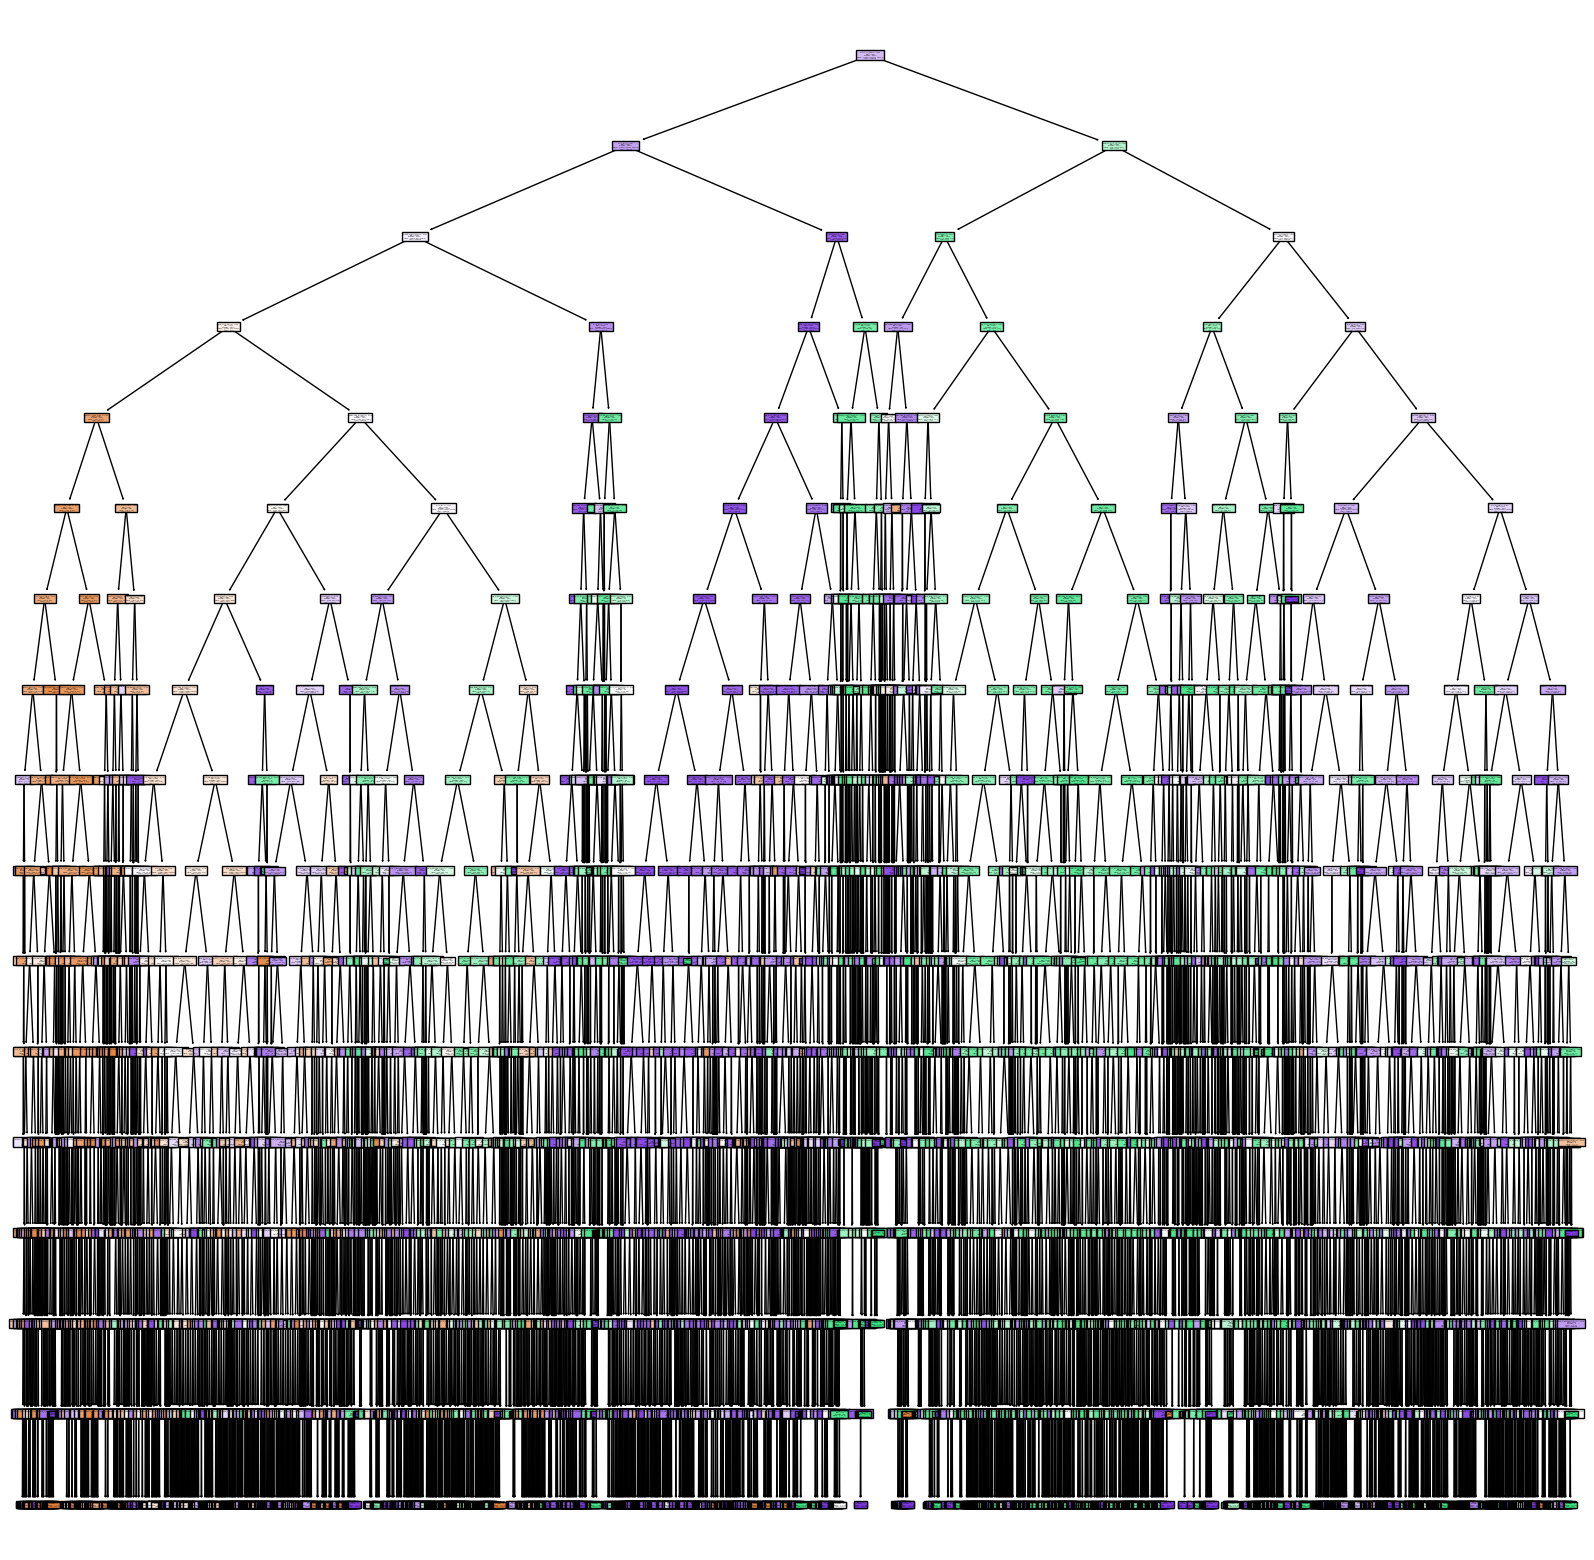

In [83]:
plt.figure(figsize=(20, 20))
plot_tree(classifier2, filled=True, feature_names=x.columns, class_names=target_encoder.classes_)
plt.show()

### RandomForestClassifier

In [84]:
classifier3 = RandomForestClassifier(random_state=1234)
classifier3.fit(x_train, y_train)

RandomForestClassifier(random_state=1234)

In [85]:
classifier3_pred = classifier3.predict(x_test)

In [86]:
print(classification_report(y_test, classifier3_pred))

              precision    recall  f1-score   support

           0       0.77      0.74      0.75      3527
           1       0.79      0.82      0.81      5874
           2       0.82      0.82      0.82     10599

    accuracy                           0.80     20000
   macro avg       0.80      0.79      0.79     20000
weighted avg       0.80      0.80      0.80     20000



## `iv` Tuning Hyperparameters

Try different **reasonable & logical** regularization hyperparameter values and evaluate.

`Q` What is the best hyperparamters value combination?

`Note:` Make sure to tune only reasonable hyperparameter values as per the dataset characteristics.

`Note:` Make sure you elaborate your reasoning behind selecting each of the hyperparameters.

`Hint:` You might want to use `sklearn.model_selection.RandomizedSearchCV` or `sklearn.model_selection.GridSearchCV` classes.

`Hint:` It could be useful, and time saving, to start the tuning with a wider range using `RandomizedSearchCV` then switch to a finer range using `GridSearchCV` once you have found the near optimal area for the hyperparameter.

In [107]:
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [10, 20, 30, 40, 50, 100, 200],
    'min_samples_leaf': [10, 20, 30, 40, 50, 100, 200],
    'criterion': ['gini', 'entropy']
}

In [108]:
grid_search = GridSearchCV(classifier, param_grid, cv=3, n_jobs=-1, verbose=3)

In [109]:
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 588 candidates, totalling 1764 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=1234),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [10, 20, 30, 40, 50, 100, 200],
                         'min_samples_split': [10, 20, 30, 40, 50, 100, 200]},
             verbose=3)

In [118]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 30,
 'min_samples_split': 10}

In [119]:
grid_search.best_score_

0.7132751006929072

## `v` Feature Importance

Explore the feature importances calculated by the best model.

`Note:` Visualizing the importances would help extract insights.

`Q` Do the importance values make sense?

`Q` Can you intrepet the importance of the few top features?

In [120]:
classifier2.feature_names_in_

array(['Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate',
       'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype=object)

In [121]:
classifier2.feature_importances_

array([0.0266282 , 0.01556886, 0.0260073 , 0.02219996, 0.01746495,
       0.04377332, 0.0730956 , 0.01107494, 0.02776938, 0.03581166,
       0.02473753, 0.05437465, 0.0163183 , 0.16384959, 0.24706646,
       0.02685144, 0.03660623, 0.04093285, 0.02861749, 0.0249199 ,
       0.01186326, 0.02446814])

------------------

# `07` Generalization Error

Now that we have tuned our solution, to an *extent*, we need to test for a final time on the held out test set.

In [122]:
best_model = grid_search.best_estimator_

In [123]:
best_model.score(x_test, y_test)

0.72325

----------------------------------------------

$$ Wish \space you \space all \space the \space best \space ♡ $$